## Basic Vector Optimization
This notebook contains a basic vector optimization example with Naive Elimination algorithm.

In [1]:
from copy import deepcopy

from vopy.utils import set_seed
from vopy.order import ConeTheta2DOrder
from vopy.algorithms import NaiveElimination
from vopy.datasets import get_dataset_instance
from vopy.utils.evaluate import calculate_epsilonF1_score

set_seed(0)

Create an `Order` object and visualize it's cone.

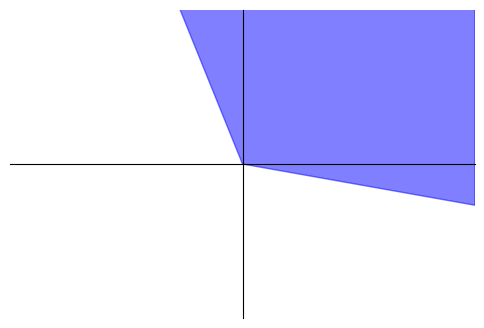

In [2]:
order = ConeTheta2DOrder(cone_degree=120)
fig_cone = order.ordering_cone.plot()

Define an instance of Disk Brake dataset and visualize the Pareto front.

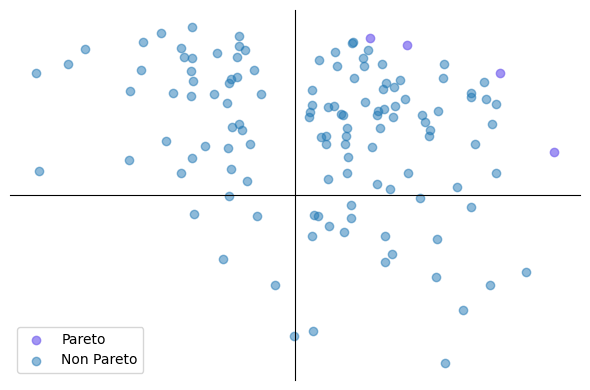

In [3]:
dataset_name = "DiskBrake"
dataset = get_dataset_instance(dataset_name)
fig_pareto = order.plot_pareto_set(dataset.out_data)

Run the most basic vector optimization algorithm `Naive Elimination` and calculate its accuracy.

In [4]:
epsilon = 0.01
delta = 0.05
noise_var = epsilon

algorithm = NaiveElimination(
    epsilon=epsilon, delta=delta,
    dataset_name=dataset_name, order=order, noise_var=noise_var, L=10
)

while True:
    is_done = algorithm.run_one_step()

    if is_done:
        break

pred_pareto_indices = sorted(list(algorithm.P))
print(f"Found Pareto front indices are: {str(pred_pareto_indices)}")

pareto_indices = order.get_pareto_set(dataset.out_data)
print(f" True Pareto front indices are: {str(list(pareto_indices))}")

eps_f1 = calculate_epsilonF1_score(
    dataset, order, pareto_indices, pred_pareto_indices, epsilon
)
print(f"epsilon-F1 Score: {eps_f1:.2f}")

Found Pareto front indices are: [25, 62, 78, 118, 126]
 True Pareto front indices are: [25, 62, 118, 126]
epsilon-F1 Score: 1.00


Emphasize predicted Pareto solutions over the Pareto front figure.

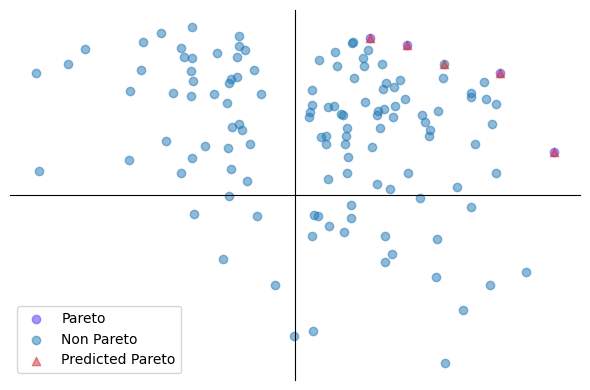

In [5]:
tmp_pareto_fig = deepcopy(fig_pareto)
tmp_pareto_fig.axes[0].scatter(
    dataset.out_data[pred_pareto_indices][:, 0],
    dataset.out_data[pred_pareto_indices][:, 1],
    c="tab:red", label="Predicted Pareto", alpha=0.5, marker="^"
)
tmp_pareto_fig.axes[0].legend()
tmp_pareto_fig